In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve


from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier



In [3]:
train=pd.read_csv("C:/Users/Adam/OneDrive/Learning/Kaggle/playground_s5e4/train.csv")
test=pd.read_csv("C:/Users/Adam/OneDrive/Learning/Kaggle/playground_s5e4/test.csv")


# train=cudf.Dataframe(train)
# test=cudf.Dataframe(test)

In [4]:
train.shape

(750000, 12)

In [5]:
train.head(20)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


In [6]:
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]


In [7]:
test['id']

0         750000
1         750001
2         750002
3         750003
4         750004
           ...  
249995    999995
249996    999996
249997    999997
249998    999998
249999    999999
Name: id, Length: 250000, dtype: int64

In [8]:
train[train['podcast_name']=='Mystery Matters'].head()

,id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
67,67,Mystery Matters,Episode 13,57.93,True Crime,72.48,Saturday,Afternoon,90.00,1.0,Neutral,30.89510
95,95,Mystery Matters,Episode 40,94.45,True Crime,53.37,Friday,Afternoon,36.36,0.0,Positive,66.59645
142,142,Mystery Matters,Episode 50,23.74,True Crime,86.73,Friday,Afternoon,NaN,2.0,Neutral,22.10401
155,155,Mystery Matters,Episode 59,108.34,True Crime,64.26,Monday,Afternoon,8.37,0.0,Neutral,76.97396


In [9]:
train.isna().mean()

id                             0.000000
podcast_name                   0.000000
episode_title                  0.000000
episode_length_minutes         0.116124
genre                          0.000000
host_popularity_percentage     0.000000
publication_day                0.000000
publication_time               0.000000
guest_popularity_percentage    0.194707
number_of_ads                  0.000001
episode_sentiment              0.000000
listening_time_minutes         0.000000
dtype: float64

In [10]:
test.isna().mean()

id                             0.000000
podcast_name                   0.000000
episode_title                  0.000000
episode_length_minutes         0.114944
genre                          0.000000
host_popularity_percentage     0.000000
publication_day                0.000000
publication_time               0.000000
guest_popularity_percentage    0.195328
number_of_ads                  0.000000
episode_sentiment              0.000000
dtype: float64

In [11]:
train.groupby('podcast_name')['episode_length_minutes'].apply(lambda x: x.isnull().mean())
## Missing values across all podcasts

podcast_name
Athlete's Arena        0.114215
Brain Boost            0.114961
Business Briefs        0.119798
Business Insights      0.119713
Comedy Corner          0.117411
Crime Chronicles       0.112755
Criminal Minds         0.118748
Current Affairs        0.127188
Daily Digest           0.116795
Detective Diaries      0.109214
Digital Digest         0.127512
Educational Nuggets    0.119396
Fashion Forward        0.111516
Finance Focus          0.112605
Fitness First          0.115404
Funny Folks            0.125032
Gadget Geek            0.125728
Game Day               0.124948
Global News            0.113122
Health Hour            0.115260
Healthy Living         0.105345
Home & Living          0.112352
Humor Hub              0.110815
Innovators             0.112909
Joke Junction          0.116956
Laugh Line             0.110816
Learning Lab           0.117810
Life Lessons           0.102669
Lifestyle Lounge       0.114879
Market Masters         0.107165
Melody Mix             0.11

In [12]:
train.groupby('podcast_name')['guest_popularity_percentage'].apply(lambda x: x.isnull().mean())
## Missing values across

podcast_name
Athlete's Arena        0.176314
Brain Boost            0.201421
Business Briefs        0.234188
Business Insights      0.217608
Comedy Corner          0.187480
Crime Chronicles       0.180672
Criminal Minds         0.197970
Current Affairs        0.190821
Daily Digest           0.200433
Detective Diaries      0.183589
Digital Digest         0.183229
Educational Nuggets    0.222376
Fashion Forward        0.190683
Finance Focus          0.205015
Fitness First          0.175390
Funny Folks            0.176318
Gadget Geek            0.225254
Game Day               0.166719
Global News            0.212909
Health Hour            0.182293
Healthy Living         0.205771
Home & Living          0.193926
Humor Hub              0.179014
Innovators             0.194920
Joke Junction          0.183694
Laugh Line             0.184216
Learning Lab           0.212188
Life Lessons           0.194967
Lifestyle Lounge       0.159594
Market Masters         0.183929
Melody Mix             0.19

In [13]:
## Check Podcast name and impute missing values with mean if possible
## Same as above for guest popularity percentage
## Generate podcast episode number 

In [14]:
train['episode_number'] = train['episode_title'].str.extract(r'Episode (\d+)', expand=False).astype(int)
test['episode_number'] = test['episode_title'].str.extract(r'Episode (\d+)', expand=False).astype(int)


In [15]:
train=train.sort_values(by=['podcast_name','episode_title'])

In [16]:
train.head()

,id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,episode_number
45,45,Athlete's Arena,Episode 1,11.68,Sports,39.19,Saturday,Morning,34.51,1.0,Negative,7.04845,1
148,148,Athlete's Arena,Episode 1,78.97,Sports,30.64,Friday,Afternoon,2.40,1.0,Neutral,55.44236,1
3120,3120,Athlete's Arena,Episode 1,NaN,Sports,63.13,Thursday,Morning,14.63,0.0,Positive,30.46573,1
3839,3839,Athlete's Arena,Episode 1,46.36,Sports,66.00,Tuesday,Morning,29.10,0.0,Negative,36.77786,1
5177,5177,Athlete's Arena,Episode 1,87.31,Sports,59.94,Thursday,Night,6.22,3.0,Neutral,68.12894,1


In [17]:
train['genre'].nunique()

10

In [18]:


def plot_feature_vs_target(df, feature, target, bins=10, figsize=(12, 5)):
 
    is_categorical = df[feature].dtype == 'object' or df[feature].nunique() <= 15

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(f'{feature} vs {target}', fontsize=16)

    if is_categorical:
        order = df[feature].value_counts().index

        # Distribution (left)
        sns.countplot(x=feature, data=df, ax=axes[0], order=order)
        axes[0].set_title('Feature Distribution')
        axes[0].tick_params(axis='x', rotation=45)

        # Mean target (right) - line plot
        mean_target = df.groupby(feature)[target].mean().reindex(order).reset_index()
        sns.lineplot(data=mean_target, x=feature, y=target, marker='o', ax=axes[1])
        axes[1].set_title('Mean Target by Category')
        axes[1].tick_params(axis='x', rotation=45)

    else:
        # Bin the continuous variable
        df['_binned'] = pd.cut(df[feature], bins=bins)

        # Distribution (left)
        sns.histplot(df[feature], bins=bins, kde=False, ax=axes[0])
        axes[0].set_title('Feature Distribution')

        # Mean target per bin (right) - line plot
        bin_means = df.groupby('_binned')[target].mean().reset_index()
        # Convert bin labels to string for x-axis
        bin_means['bin_label'] = bin_means['_binned'].astype(str)
        sns.lineplot(data=bin_means, x='bin_label', y=target, marker='o', ax=axes[1])
        axes[1].set_title('Mean Target by Bin')
        axes[1].tick_params(axis='x', rotation=45)

        df.drop(columns=['_binned'], inplace=True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\1526188594.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('_binned')[target].mean().reset_index()


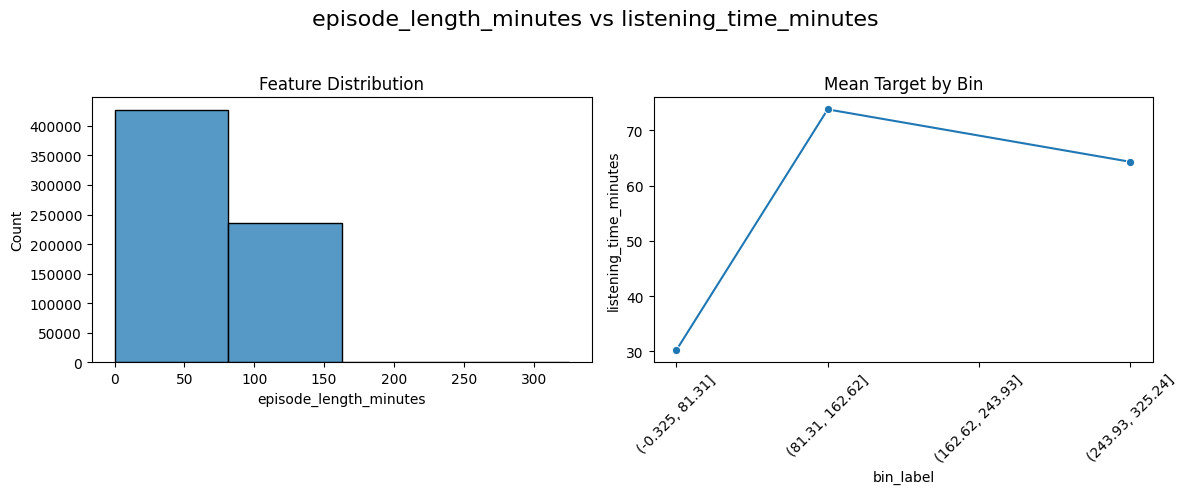

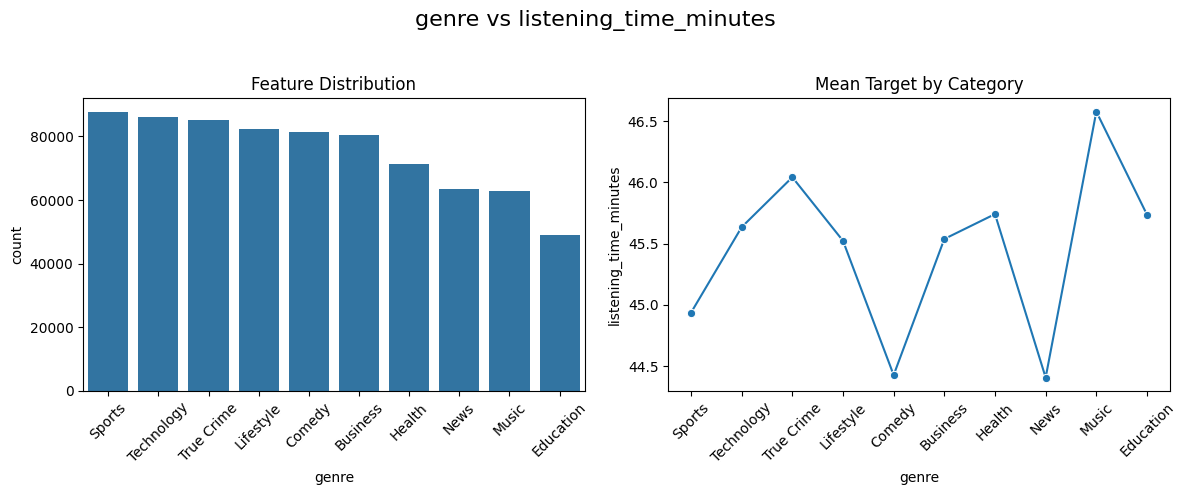

C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\1526188594.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('_binned')[target].mean().reset_index()


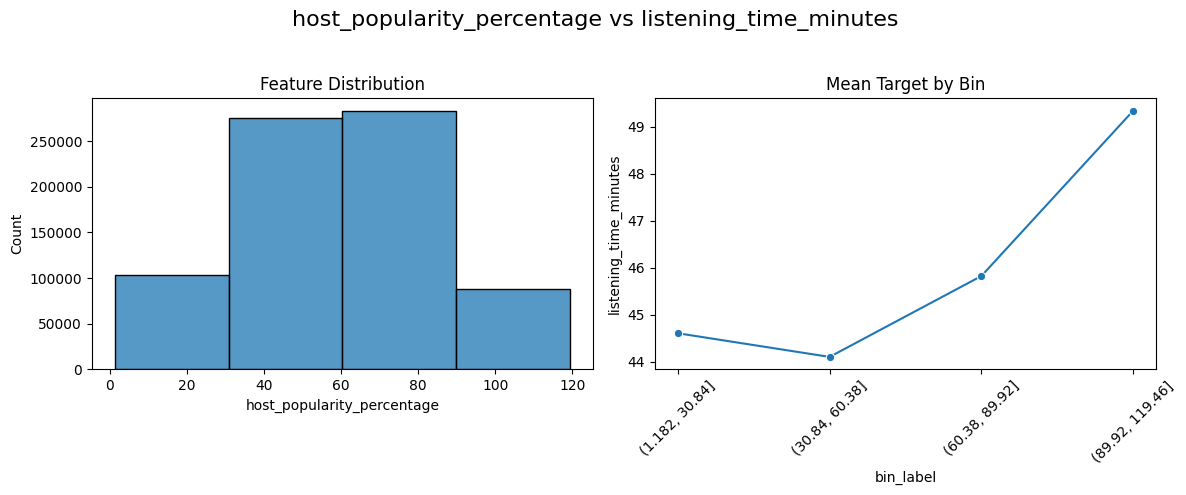

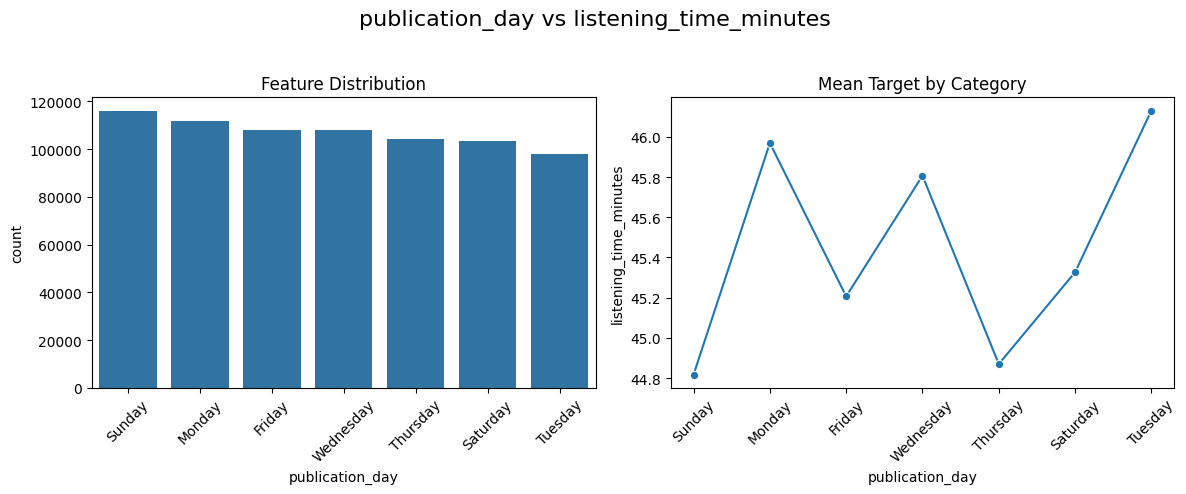

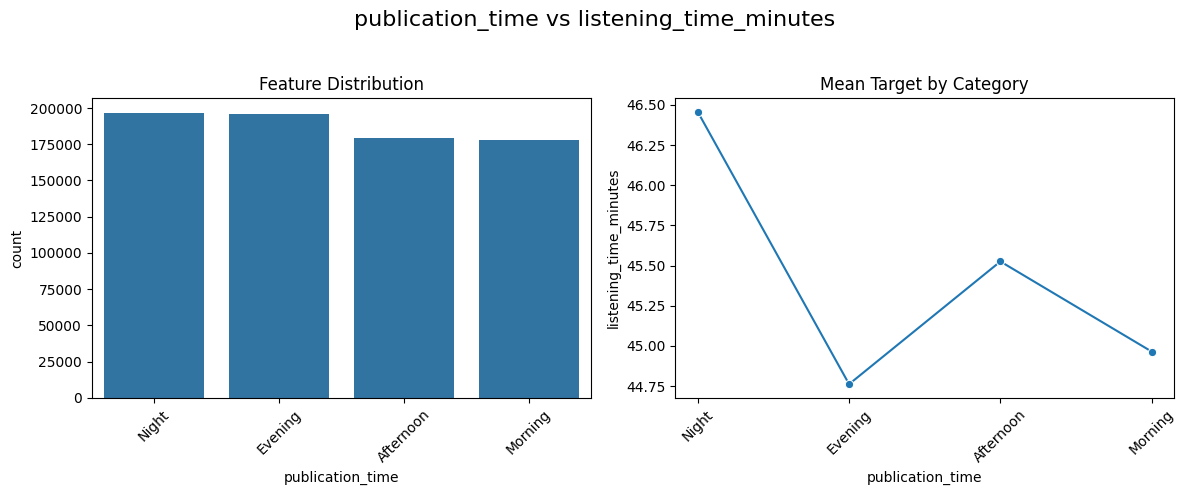

C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\1526188594.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('_binned')[target].mean().reset_index()


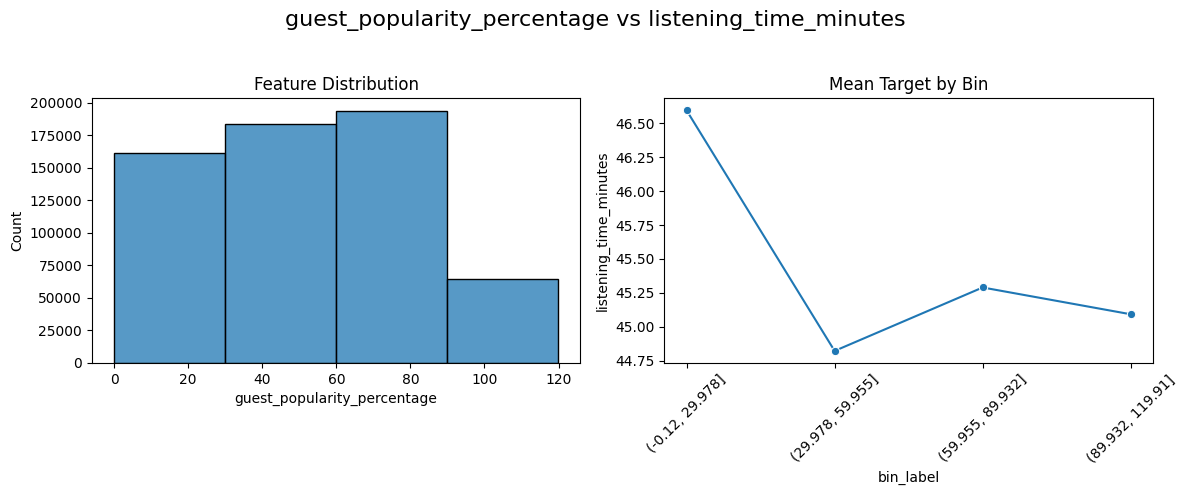

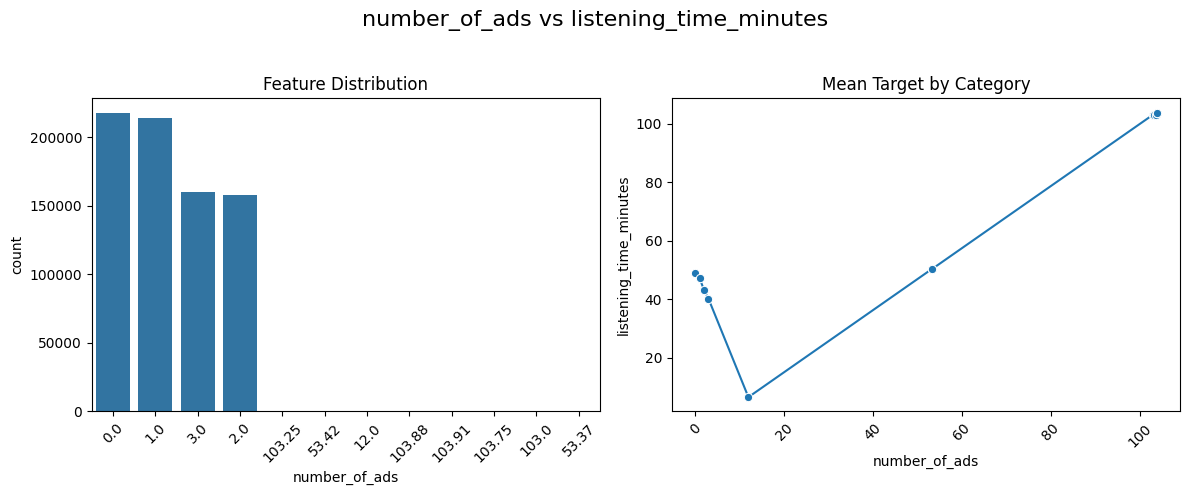

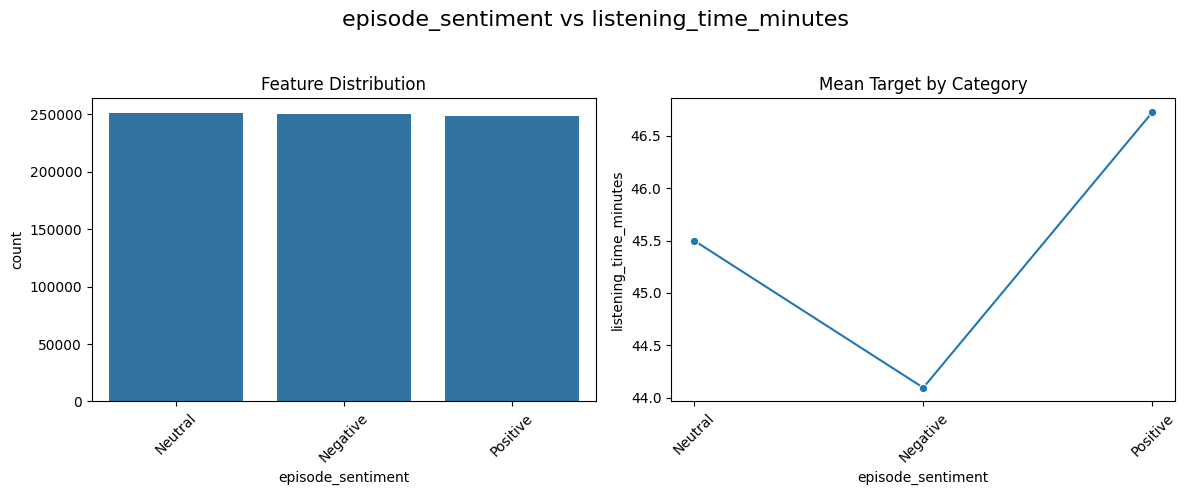

C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\1526188594.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('_binned')[target].mean().reset_index()


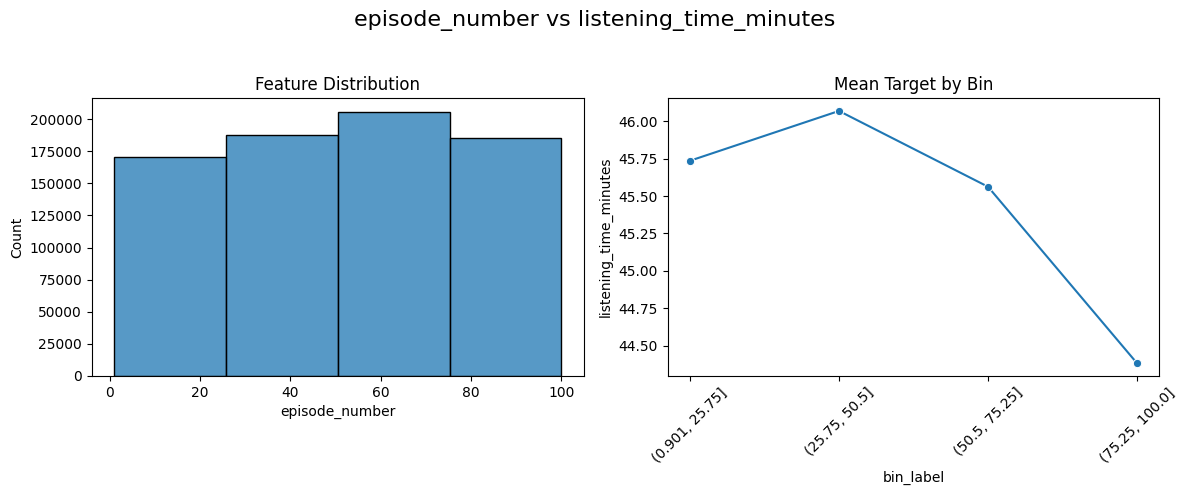

In [19]:
for col in train.drop(columns=['id','podcast_name','episode_title','listening_time_minutes']):
    plot_feature_vs_target(train, col, 'listening_time_minutes', bins=4)

In [20]:
train['episode_length_minutes'].quantile(0.99)

np.float64(119.02)

In [21]:
train['number_of_ads'].describe()
train[train['number_of_ads']>3]



,id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,episode_number
495919,495919,Comedy Corner,Episode 79,64.83,Comedy,48.37,Saturday,Evening,NaN,53.42,Neutral,50.44892,79
683147,683147,Crime Chronicles,Episode 15,109.93,True Crime,59.66,Tuesday,Evening,77.91,103.88,Neutral,103.89696,15
567235,567235,Detective Diaries,Episode 21,16.13,True Crime,49.11,Tuesday,Evening,43.17,12.00,Positive,6.49000,21
283606,283606,Health Hour,Episode 15,109.93,Health,67.81,Sunday,Morning,77.90,103.91,Neutral,103.89696,15
672139,672139,Sound Waves,Episode 35,115.74,Music,28.95,Tuesday,Afternoon,23.50,103.25,Neutral,103.12686,35
602553,602553,Sound Waves,Episode 53,112.27,Music,28.19,Tuesday,Morning,23.15,103.25,Neutral,103.12686,53
537705,537705,Sound Waves,Episode 64,112.27,Music,28.95,Saturday,Morning,10.15,103.75,Neutral,103.12686,64
436577,436577,Sports Central,Episode 64,115.25,Sports,28.58,Saturday,Afternoon,23.65,103.00,Neutral,103.12686,64
211159,211159,Wellness Wave,Episode 83,64.83,Health,48.46,Sunday,Evening,NaN,53.37,Positive,50.44892,83


In [22]:
train.isna().mean()

id                             0.000000
podcast_name                   0.000000
episode_title                  0.000000
episode_length_minutes         0.116124
genre                          0.000000
host_popularity_percentage     0.000000
publication_day                0.000000
publication_time               0.000000
guest_popularity_percentage    0.194707
number_of_ads                  0.000001
episode_sentiment              0.000000
listening_time_minutes         0.000000
episode_number                 0.000000
dtype: float64

### Feature Engineering

In [23]:
## Capping the number of ads to 3
train['number_of_ads_new']=train['number_of_ads'].clip(upper=3)
test['number_of_ads_new']=test['number_of_ads'].clip(upper=3)

train['number_of_ads_new'].describe()

missing_cols=['episode_length_minutes','guest_popularity_percentage','number_of_ads_new']

for i in missing_cols:
    train[i] = train[i].fillna(train.groupby(['podcast_name','publication_time'])[i].transform('median'))
    test[i] = test[i].fillna(train.groupby(['podcast_name','publication_time'])[i].transform('median'))



train['guest_pop_qcut'], bins = pd.qcut(
    train['guest_popularity_percentage'], 
    q=4, 
    labels=False, 
    retbins=True, 
    duplicates='drop'
)

test['guest_pop_qcut'] = pd.cut(
    test['guest_popularity_percentage'], 
    bins=bins, 
    labels=False, 
    include_lowest=True
)

train['episode_number_qcut'], bins = pd.qcut(
    train['episode_number'], 
    q=4, 
    labels=False, 
    retbins=True, 
    duplicates='drop'
)

test['episode_number_qcut'] = pd.cut(
    test['episode_number'], 
    bins=bins, 
    labels=False, 
    include_lowest=True
)


## Mark if the podcast is a top 10 podcast in the genre
train['avg_host_popularity'] = train.groupby(['podcast_name'])['host_popularity_percentage'].transform('median')

rank_df = (
    train[['podcast_name', 'avg_host_popularity']]
    .drop_duplicates()
    .sort_values(['podcast_name', 'avg_host_popularity'], ascending=[True, False])
    .groupby('podcast_name')
    .apply(lambda g: g.assign(
        genre_popularity_rank=g['avg_host_popularity'].rank(method='dense', ascending=False).astype(int))
    )
    .reset_index(drop=True)
)
rank_map = rank_df.set_index(['podcast_name'])['genre_popularity_rank']
train['genre_popularity_rank'] = train.set_index(['genre', 'podcast_name']).index.map(rank_map)




C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\704157068.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(


In [24]:
train['avg_host_popularity'] = train.groupby(['genre', 'podcast_name'])['host_popularity_percentage'].transform('mean')


# Step 2: Create unique podcast-genre rows with their average popularity
rank_df = (
    train[['genre', 'podcast_name', 'avg_host_popularity']]
    .drop_duplicates()
    .sort_values(['genre', 'avg_host_popularity'], ascending=[True, False])
    .groupby('genre')
    .apply(lambda g: g.assign(
        genre_popularity_rank=g['avg_host_popularity'].rank(method='dense', ascending=False).astype(int))
    )
    .reset_index(drop=True)
)

# Step 3: Map rank back to full dataset using genre and podcast name
rank_map = rank_df.set_index(['genre', 'podcast_name'])['genre_popularity_rank']
train['genre_popularity_rank'] = train.set_index(['genre', 'podcast_name']).index.map(rank_map)
test['genre_popularity_rank'] = test.set_index(['genre', 'podcast_name']).index.map(rank_map)

C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\1622969600.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(


In [25]:
test.isna().mean()

id                             0.000000
podcast_name                   0.000000
episode_title                  0.000000
episode_length_minutes         0.000000
genre                          0.000000
host_popularity_percentage     0.000000
publication_day                0.000000
publication_time               0.000000
guest_popularity_percentage    0.000000
number_of_ads                  0.000000
episode_sentiment              0.000000
episode_number                 0.000000
number_of_ads_new              0.000000
guest_pop_qcut                 0.000000
episode_number_qcut            0.000000
genre_popularity_rank          0.000108
dtype: float64

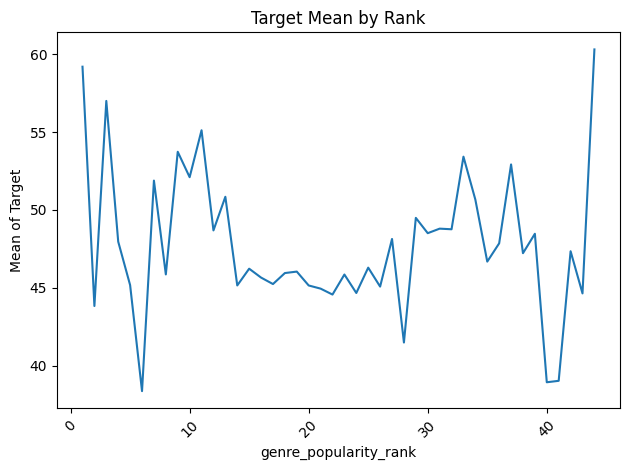

In [26]:

target_means = train.groupby('genre_popularity_rank')['listening_time_minutes'].mean().reset_index()

# Step 2: Plot using seaborn
sns.lineplot(x='genre_popularity_rank', y='listening_time_minutes', data=target_means)
plt.ylabel('Mean of Target')
plt.title('Target Mean by Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
train.columns

Index(['id', 'podcast_name', 'episode_title', 'episode_length_minutes',
       'genre', 'host_popularity_percentage', 'publication_day',
       'publication_time', 'guest_popularity_percentage', 'number_of_ads',
       'episode_sentiment', 'listening_time_minutes', 'episode_number',
       'number_of_ads_new', 'guest_pop_qcut', 'episode_number_qcut',
       'avg_host_popularity', 'genre_popularity_rank'],
      dtype='object')

In [28]:
continuous_cols = train.select_dtypes(include=[np.number]).columns
continuous_cols

continuous_cols =continuous_cols.drop(['id'])
continuous_cols

Index(['episode_length_minutes', 'host_popularity_percentage',
       'guest_popularity_percentage', 'number_of_ads',
       'listening_time_minutes', 'episode_number', 'number_of_ads_new',
       'guest_pop_qcut', 'episode_number_qcut', 'avg_host_popularity',
       'genre_popularity_rank'],
      dtype='object')

In [29]:
train['genre_popularity_rank'].unique()

array([18, 39, 15, 34, 10,  9, 33,  2,  4, 21,  6, 26, 29, 12, 41, 30, 38,
       23, 32,  8,  1,  3, 22, 11, 13, 42, 24, 25,  5, 17, 27, 14, 16, 35,
       19, 28, 37, 36,  7, 31, 40, 20, 44, 43])

In [30]:
percentile_99 = train[continuous_cols].quantile(0.99)
percentile_99

episode_length_minutes         118.890000
host_popularity_percentage      99.060000
guest_popularity_percentage     98.860000
number_of_ads                    3.000000
listening_time_minutes         109.396340
episode_number                  99.000000
number_of_ads_new                3.000000
guest_pop_qcut                   3.000000
episode_number_qcut              3.000000
avg_host_popularity             61.635996
genre_popularity_rank           26.000000
Name: 0.99, dtype: float64

Text(0.5, 0, 'Data')

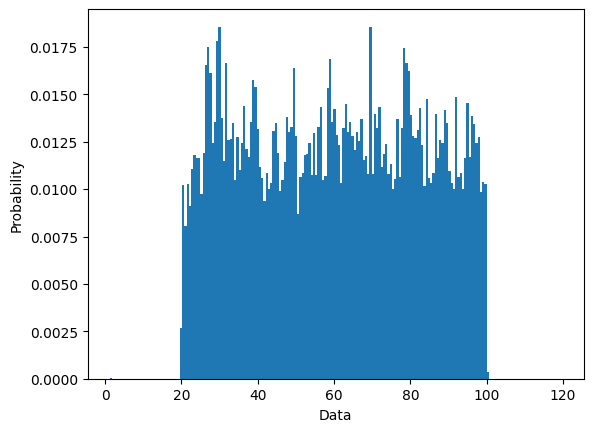

In [31]:

plt.hist(train['host_popularity_percentage'], density=True, bins=200)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')


In [32]:
continuous_cols=continuous_cols.drop(['listening_time_minutes','genre_popularity_rank','avg_host_popularity'])
train[continuous_cols] = train[continuous_cols].clip(upper=percentile_99,axis=1)
test[continuous_cols] = test[continuous_cols].clip(upper=percentile_99,axis=1)

percentile_99 = train[continuous_cols].quantile(0.99)


In [33]:
# g = sns.FacetGrid(train, col="podcast_name", col_wrap=3, height=4, sharex=True, sharey=True)
# g.map_dataframe(sns.histplot, x="episode_length_minutes", bins=10, kde=True, alpha=0.6)

# # Adjust layout
# g.set_axis_labels("Episode Length (minutes)", "Frequency")
# g.set_titles(col_template="{col_name}")
# plt.show()

In [34]:
test.isna().mean()

id                             0.000000
podcast_name                   0.000000
episode_title                  0.000000
episode_length_minutes         0.000000
genre                          0.000000
host_popularity_percentage     0.000000
publication_day                0.000000
publication_time               0.000000
guest_popularity_percentage    0.000000
number_of_ads                  0.000000
episode_sentiment              0.000000
episode_number                 0.000000
number_of_ads_new              0.000000
guest_pop_qcut                 0.000000
episode_number_qcut            0.000000
genre_popularity_rank          0.000108
dtype: float64

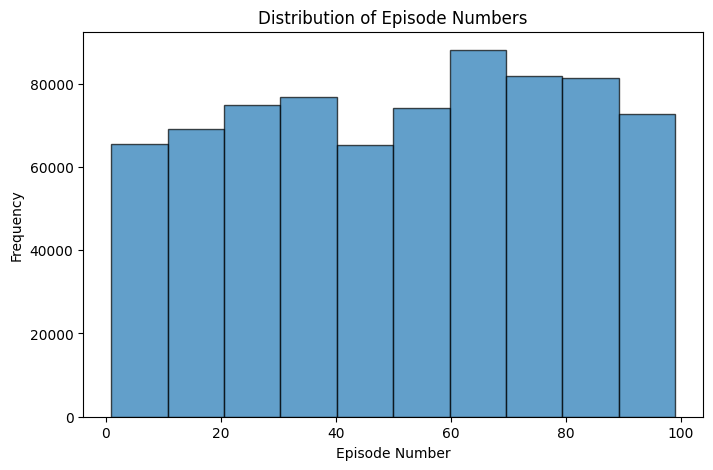

In [35]:
plt.figure(figsize=(8, 5))  # Set figure size
plt.hist(train['episode_number'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Episode Number')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Numbers')

# Show plot
plt.show()

In [36]:
test['genre'].unique()

array(['Education', 'Music', 'Comedy', 'Lifestyle', 'Business',
       'True Crime', 'Technology', 'News', 'Sports', 'Health'],
      dtype=object)

In [37]:
display(train[train.applymap(lambda x: "Athlete's Arena" in str(x))])

C:\Users\Adam\AppData\Local\Temp\ipykernel_29372\2275649188.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(train[train.applymap(lambda x: "Athlete's Arena" in str(x))])


,id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,episode_number,number_of_ads_new,guest_pop_qcut,episode_number_qcut,avg_host_popularity,genre_popularity_rank
45,NaN,Athlete's Arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,Athlete's Arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3120,NaN,Athlete's Arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,NaN,Athlete's Arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5177,NaN,Athlete's Arena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
train['genre'].unique()

array(['Sports', 'Music', 'Comedy', 'True Crime', 'Education',
       'Lifestyle', 'News', 'Technology', 'Business', 'Health'],
      dtype=object)

In [39]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns=['episode_sentiment','genre','publication_day','publication_time','guest_pop_qcut','episode_number_qcut']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # Ignore unseen categories in test

train_encoded = encoder.fit_transform(train[categorical_columns])
test_encoded = encoder.transform(test[categorical_columns])

In [40]:
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [41]:
train_new = train.drop(columns=categorical_columns).reset_index(drop=True)
test_new = test.drop(columns=categorical_columns).reset_index(drop=True)

In [42]:
train_new = pd.concat([train_new, train_encoded_df], axis=1)
test_new = pd.concat([test_new, test_encoded_df], axis=1)

In [43]:
train_new.columns

Index(['id', 'podcast_name', 'episode_title', 'episode_length_minutes',
       'host_popularity_percentage', 'guest_popularity_percentage',
       'number_of_ads', 'listening_time_minutes', 'episode_number',
       'number_of_ads_new', 'avg_host_popularity', 'genre_popularity_rank',
       'episode_sentiment_Neutral', 'episode_sentiment_Positive',
       'genre_Comedy', 'genre_Education', 'genre_Health', 'genre_Lifestyle',
       'genre_Music', 'genre_News', 'genre_Sports', 'genre_Technology',
       'genre_True Crime', 'publication_day_Monday',
       'publication_day_Saturday', 'publication_day_Sunday',
       'publication_day_Thursday', 'publication_day_Tuesday',
       'publication_day_Wednesday', 'publication_time_Evening',
       'publication_time_Morning', 'publication_time_Night',
       'guest_pop_qcut_1', 'guest_pop_qcut_2', 'guest_pop_qcut_3',
       'episode_number_qcut_1', 'episode_number_qcut_2',
       'episode_number_qcut_3'],
      dtype='object')

In [44]:
test_new.columns

Index(['id', 'podcast_name', 'episode_title', 'episode_length_minutes',
       'host_popularity_percentage', 'guest_popularity_percentage',
       'number_of_ads', 'episode_number', 'number_of_ads_new',
       'genre_popularity_rank', 'episode_sentiment_Neutral',
       'episode_sentiment_Positive', 'genre_Comedy', 'genre_Education',
       'genre_Health', 'genre_Lifestyle', 'genre_Music', 'genre_News',
       'genre_Sports', 'genre_Technology', 'genre_True Crime',
       'publication_day_Monday', 'publication_day_Saturday',
       'publication_day_Sunday', 'publication_day_Thursday',
       'publication_day_Tuesday', 'publication_day_Wednesday',
       'publication_time_Evening', 'publication_time_Morning',
       'publication_time_Night', 'guest_pop_qcut_1', 'guest_pop_qcut_2',
       'guest_pop_qcut_3', 'episode_number_qcut_1', 'episode_number_qcut_2',
       'episode_number_qcut_3'],
      dtype='object')

In [45]:
missing_cols=[a for a in train_new.columns if a not in test_new.columns]
missing_cols

['listening_time_minutes', 'avg_host_popularity']

In [ ]:

test_new['genre_popularity_rank'] = test_new['genre_popularity_rank'].fillna(train_new['genre_popularity_rank'].mean())

In [47]:
test_new['genre_popularity_rank'].unique()

array([18.        , 21.        , 20.        , 19.        , 15.        ,
       25.        , 23.        , 22.        , 16.        , 24.        ,
       26.        , 14.        , 17.        ,  6.        , 44.        ,
        4.        , 13.        , 27.        , 10.        , 37.        ,
        7.        , 36.        ,  3.        , 34.        , 11.        ,
       41.        , 29.        , 35.        , 33.        , 42.        ,
       39.        , 38.        , 20.42165354,  9.        ,  1.        ,
        8.        , 32.        , 28.        , 30.        , 12.        ,
        5.        , 31.        , 40.        ,  2.        , 43.        ])

In [48]:
# train_new['int_positive_episode_length']=train_new['episode_length_minutes']*train_new['episode_sentiment_Positive']
# test_new['int_positive_episode_length']=test_new['episode_length_minutes']*test_new['episode_sentiment_Positive']


### Using OLS to understand variable impact

In [49]:
# train_new['ltm_bin'] = pd.qcut(train_new['listening_time_minutes'], q=10, labels=False)

In [51]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = train_new.drop(columns=['id','listening_time_minutes','podcast_name','episode_title','guest_popularity_percentage',\
                            'number_of_ads','episode_number','avg_host_popularity'])
y = train_new['listening_time_minutes']

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=train_new['ltm_bin'],test_size=0.2, random_state=42)


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_with_const = X_train.copy()

vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

vif_data = vif_data[vif_data['feature'] != 'const']

print(vif_data.sort_values(by="VIF", ascending=False))

                       feature       VIF
4        genre_popularity_rank  2.489176
14            genre_Technology  2.376771
9                 genre_Health  2.047098
15            genre_True Crime  1.958429
7                 genre_Comedy  1.881701
13                genre_Sports  1.870154
10             genre_Lifestyle  1.825775
8              genre_Education  1.760478
18      publication_day_Sunday  1.751293
16      publication_day_Monday  1.729572
12                  genre_News  1.716094
21   publication_day_Wednesday  1.710035
19    publication_day_Thursday  1.691808
17    publication_day_Saturday  1.687011
11                 genre_Music  1.686615
20     publication_day_Tuesday  1.656975
24      publication_time_Night  1.552699
22    publication_time_Evening  1.547123
23    publication_time_Morning  1.525553
26            guest_pop_qcut_2  1.518237
25            guest_pop_qcut_1  1.512557
27            guest_pop_qcut_3  1.502808
29       episode_number_qcut_2  1.480523
30       episode

In [59]:
X_train.head()

,const,episode_length_minutes,host_popularity_percentage,number_of_ads_new,genre_popularity_rank,episode_sentiment_Neutral,episode_sentiment_Positive,genre_Comedy,genre_Education,genre_Health,...,publication_day_Wednesday,publication_time_Evening,publication_time_Morning,publication_time_Night,guest_pop_qcut_1,guest_pop_qcut_2,guest_pop_qcut_3,episode_number_qcut_1,episode_number_qcut_2,episode_number_qcut_3
453635,1.0,61.57,34.81,1.0,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11651,1.0,52.00,22.33,3.0,18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
431999,1.0,110.67,62.05,2.0,20,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
529211,1.0,63.61,64.48,1.0,20,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
110925,1.0,35.35,94.11,1.0,16,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
model = sm.OLS(y_train, X_train).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     listening_time_minutes   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                 6.271e+04
Date:                    Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                            11:03:47   Log-Likelihood:            -2.4061e+06
No. Observations:                  600000   AIC:                         4.812e+06
Df Residuals:                      599969   BIC:                         4.813e+06
Df Model:                              30                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.0065      0.209    -14.418      0.000      -3.415      -2.598
episode_length_minutes         0.7539      0.001   1351.753      0.000       0.753       0.755
host_popularity_percentage     0.0364      0.001     48.167      0.000       0.035       0.038
number_of_ads_new             -1.8439      0.016   -118.529      0.000      -1.874      -1.813
genre_popularity_rank          0.0035      0.008      0.417      0.677      -0.013       0.020
episode_sentiment_Neutral      0.0058      0.042      0.139      0.890      -0.077       0.089
episode_sentiment_Positive     1.0923      0.042     25.825      0.000       1.009       1.175
genre_Comedy                  -0.1533      0.076     -2.017      0.044      -0.302      -0.004
genre_Education               -0.0189      0.093     -0.204      0.838      -0.200       0.163
genre_Health                  -0.3260      0.084     -3.887      0.000      -0.490      -0.162
genre_Lifestyle               -0.2704      0.074     -3.632      0.000      -0.416      -0.125
genre_Music                   -0.1564      0.081     -1.933      0.053      -0.315       0.002
genre_News                    -0.3694      0.081     -4.552      0.000      -0.528      -0.210
genre_Sports                  -0.3394      0.073     -4.627      0.000      -0.483      -0.196
genre_Technology               0.5811      0.083      6.980      0.000       0.418       0.744
genre_True Crime               0.4993      0.076      6.568      0.000       0.350       0.648
publication_day_Monday         0.0641      0.064      1.007      0.314      -0.061       0.189
publication_day_Saturday       0.1587      0.065      2.447      0.014       0.032       0.286
publication_day_Sunday        -0.1827      0.063     -2.897      0.004      -0.306      -0.059
publication_day_Thursday      -0.0038      0.065     -0.059      0.953      -0.131       0.123
publication_day_Tuesday       -0.1155      0.066     -1.755      0.079      -0.245       0.013
publication_day_Wednesday      0.0327      0.064      0.510      0.610      -0.093       0.159
publication_time_Evening      -0.0144      0.049     -0.294      0.768      -0.110       0.081
publication_time_Morning       0.1754      0.050      3.506      0.000       0.077       0.273
publication_time_Night         0.1620      0.049      3.318      0.001       0.066       0.258
guest_pop_qcut_1              -0.4643      0.049     -9.490      0.000      -0.560      -0.368
guest_pop_qcut_2              -0.3816      0.049     -7.779      0.000      -0.478      -0.285
guest_pop_qcut_3              -0.6268      0.049    -12.848      0.000      -0.722      -0.531
episode_number_qcut_1          0.2371      0.049      4.861      0.000       0.141       0.333

In [62]:
missing_cols=[a for a in X_train.columns if a not in test_new.columns]
missing_cols

['const']

In [63]:
train_new.shape

(750000, 38)

In [64]:
test_new_predict= test_new.drop(columns=['id','podcast_name','episode_title','guest_popularity_percentage',\
                            'number_of_ads','episode_number'])

In [65]:
test_new.shape

(250000, 36)

In [66]:
test_new.isna().sum()

id                             0
podcast_name                   0
episode_title                  0
episode_length_minutes         0
host_popularity_percentage     0
guest_popularity_percentage    0
number_of_ads                  0
episode_number                 0
number_of_ads_new              0
genre_popularity_rank          0
episode_sentiment_Neutral      0
episode_sentiment_Positive     0
genre_Comedy                   0
genre_Education                0
genre_Health                   0
genre_Lifestyle                0
genre_Music                    0
genre_News                     0
genre_Sports                   0
genre_Technology               0
genre_True Crime               0
publication_day_Monday         0
publication_day_Saturday       0
publication_day_Sunday         0
publication_day_Thursday       0
publication_day_Tuesday        0
publication_day_Wednesday      0
publication_time_Evening       0
publication_time_Morning       0
publication_time_Night         0
guest_pop_

In [67]:
test_new_final=sm.add_constant(test_new_predict)
y_pred = model.predict(test_new_final)

In [68]:
y_pred

0         55.929851
1         20.130141
2         51.921969
3         81.824907
4         50.188291
            ...    
249995     8.914259
249996    59.450637
249997     4.638546
249998    79.509956
249999    57.331215
Length: 250000, dtype: float64

In [69]:
test_new.columns

Index(['id', 'podcast_name', 'episode_title', 'episode_length_minutes',
       'host_popularity_percentage', 'guest_popularity_percentage',
       'number_of_ads', 'episode_number', 'number_of_ads_new',
       'genre_popularity_rank', 'episode_sentiment_Neutral',
       'episode_sentiment_Positive', 'genre_Comedy', 'genre_Education',
       'genre_Health', 'genre_Lifestyle', 'genre_Music', 'genre_News',
       'genre_Sports', 'genre_Technology', 'genre_True Crime',
       'publication_day_Monday', 'publication_day_Saturday',
       'publication_day_Sunday', 'publication_day_Thursday',
       'publication_day_Tuesday', 'publication_day_Wednesday',
       'publication_time_Evening', 'publication_time_Morning',
       'publication_time_Night', 'guest_pop_qcut_1', 'guest_pop_qcut_2',
       'guest_pop_qcut_3', 'episode_number_qcut_1', 'episode_number_qcut_2',
       'episode_number_qcut_3'],
      dtype='object')

In [70]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
y_pred_submit=model.predict(test_new_final)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"OLS - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

OLS - MSE: 178.4339, RMSE: 13.3579


In [236]:
submission = pd.DataFrame({
    'id': test_new['id'],  
    'Listening_Time_Minutes': y_pred_submit
})

In [237]:
submission

,id,Listening_Time_Minutes
0,750000,55.859414
1,750001,20.091021
2,750002,51.890020
3,750003,81.685736
4,750004,50.127564
...,...,...
249995,999995,8.889870
249996,999996,59.399709
249997,999997,4.632515
249998,999998,79.509816


In [238]:
import os
cwd = os.getcwd()
cwd

'c:\\Users\\Adam\\OneDrive\\Learning\\Kaggle\\playground_s5e4'

In [116]:
submission.to_csv('Ver4_OLS_OHE_Corrected_Final.csv',index=False)

In [ ]:
from sklearn.metrics import mean_squared_error

## KNN

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

param_dist = {
    'n_neighbors': list(range(2, 51)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search_knn.fit(X_train, y_train)
print("Best Hyperparameters:", random_search_knn.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
best_knn = random_search_knn.best_estimator_
y_pred = best_knn.predict(X_test)

In [ ]:

# 🔹 Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"KNN - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

KNN - MSE: 232.7094, RMSE: 15.2548


In [71]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(random_state=42)

search_spaces = {
    'n_estimators': [100, 200, 300, 500, 600],
    'max_depth': [5, 10, 15, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=15,
    cv=3,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

opt.fit(X_train, y_train)

results = pd.DataFrame(opt.cv_results_).sort_values("rank_test_score")
display(results[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']])

print("Best Hyperparameters:", opt.best_params_)
print("Best RMSE (CV):", np.sqrt(-opt.best_score_))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor


# param_dist = {
#     'n_estimators': [100, 200, 300, 500,600],
#     'max_depth': [5, 10, 15, 20, None],
#     'max_features': ['sqrt', 'log2', None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


# rf = RandomForestRegressor(random_state=42)
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=15,
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     random_state=42,
#     return_train_score=True,
#     scoring='neg_mean_squared_error'  # ← optimize for MSE
# )
# random_search.fit(X_train, y_train)

# cv_results = pd.DataFrame(random_search.cv_results_)

# cv_results = cv_results[['rank_test_score', 'mean_test_score', 'std_test_score', 
#                          'mean_train_score', 'std_train_score', 'params']]

# cv_results = cv_results.sort_values(by="rank_test_score")


# display(cv_results)

# print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


KeyboardInterrupt: 

In [268]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_results) + 1), cv_results["mean_test_score"], marker='o', linestyle='dashed', label="Validation Score")
plt.plot(range(1, len(cv_results) + 1), cv_results["mean_train_score"], marker='o', linestyle='solid', label="Train Score")
plt.xlabel("Iteration")
plt.ylabel("Negative Mean Squared Error")
plt.title("Performance at Each Step of RandomizedSearchCV")
plt.legend()
plt.show()

NameError: name 'cv_results' is not defined

<Figure size 1200x600 with 0 Axes>

In [124]:
print("Best Hyperparameters:", random_search.best_params_)

# Best model
best_rf = random_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Optimized Random Forest - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Optimized Random Forest - MSE: 163.6947, RMSE: 12.7943


In [125]:
feature_importances = best_rf.feature_importances_

# Convert to DataFrame for better readability
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

KeyboardInterrupt: 

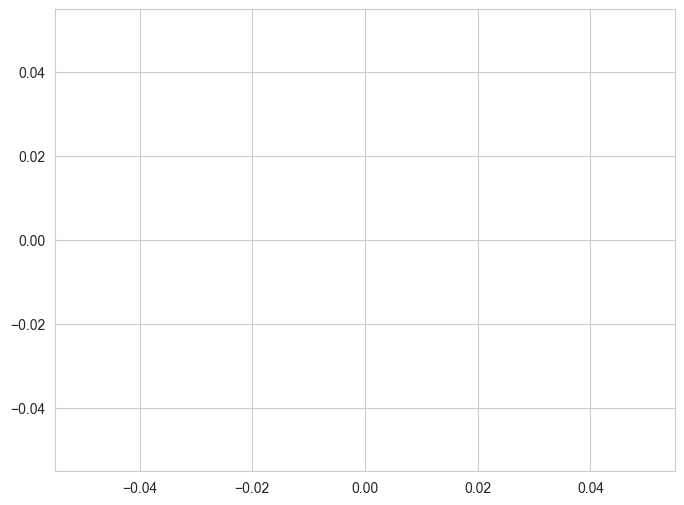

In [126]:
from sklearn.metrics import r2_score
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))

# Density scatter plot
sns.kdeplot(x=y_test, y=y_pred, cmap="Blues", fill=True)

# Regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'label': 'Regression Line'})

# Perfect fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs. Predicted Values (Random Forest)", fontsize=14)
plt.legend()
plt.show()

# Print R-squared score
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

In [127]:
importance_df

,Feature,Importance
1,episode_length_minutes,0.882805
2,host_popularity_percentage,0.045704
3,number_of_ads_new,0.010882
5,episode_sentiment_Positive,0.003280
4,episode_sentiment_Neutral,0.003189
28,episode_number_qcut_2,0.003039
23,publication_time_Night,0.003001
25,guest_pop_qcut_2,0.002970
21,publication_time_Evening,0.002967
26,guest_pop_qcut_3,0.002960


In [136]:
X_train.columns

Index(['const', 'episode_length_minutes', 'host_popularity_percentage',
       'number_of_ads_new', 'episode_sentiment_Neutral',
       'episode_sentiment_Positive', 'genre_Comedy', 'genre_Education',
       'genre_Health', 'genre_Lifestyle', 'genre_Music', 'genre_News',
       'genre_Sports', 'genre_Technology', 'genre_True Crime',
       'publication_day_Monday', 'publication_day_Saturday',
       'publication_day_Sunday', 'publication_day_Thursday',
       'publication_day_Tuesday', 'publication_day_Wednesday',
       'publication_time_Evening', 'publication_time_Morning',
       'publication_time_Night', 'guest_pop_qcut_1', 'guest_pop_qcut_2',
       'guest_pop_qcut_3', 'episode_number_qcut_1', 'episode_number_qcut_2',
       'episode_number_qcut_3'],
      dtype='object')

In [140]:
test_new.columns

Index(['id', 'podcast_name', 'episode_title', 'episode_length_minutes',
       'host_popularity_percentage', 'guest_popularity_percentage',
       'number_of_ads', 'episode_number', 'number_of_ads_new',
       'episode_sentiment_Neutral', 'episode_sentiment_Positive',
       'genre_Comedy', 'genre_Education', 'genre_Health', 'genre_Lifestyle',
       'genre_Music', 'genre_News', 'genre_Sports', 'genre_Technology',
       'genre_True Crime', 'publication_day_Monday',
       'publication_day_Saturday', 'publication_day_Sunday',
       'publication_day_Thursday', 'publication_day_Tuesday',
       'publication_day_Wednesday', 'publication_time_Evening',
       'publication_time_Morning', 'publication_time_Night',
       'guest_pop_qcut_1', 'guest_pop_qcut_2', 'guest_pop_qcut_3',
       'episode_number_qcut_1', 'episode_number_qcut_2',
       'episode_number_qcut_3'],
      dtype='object')

In [250]:
test_new_predict_rf=sm.add_constant(test_new)

In [251]:
test_new_predict_rf['const']=1

In [204]:
y_pred_submit = best_rf.predict(test_new_predict_rf[[col for col in X_train.columns]])


In [205]:
submission = pd.DataFrame({
    'id': test_new_predict_rf['id'],  
    'Listening_Time_Minutes': y_pred_submit
})

In [206]:
submission.to_csv('Ver4_RF_RSHPT_OHE_Corrected_Final.csv',index=False)

In [207]:
test_new['id']

0         750000
1         750001
2         750002
3         750003
4         750004
           ...  
249995    999995
249996    999996
249997    999997
249998    999998
249999    999999
Name: id, Length: 250000, dtype: int64

### XGBoost

In [208]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost-specific hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10,20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 1, 5],  
    'reg_alpha': [0, 0.1, 1],  # L1
    'reg_lambda': [1, 1.5, 2]  # L2
}

# XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True,
    scoring='neg_mean_squared_error'
)

# Fit to training data
random_search_xgb.fit(X_train, y_train)
cv_results = pd.DataFrame(random_search_xgb.cv_results_)

cv_results = cv_results[['rank_test_score', 'mean_test_score', 'std_test_score', 
                         'mean_train_score', 'std_train_score', 'params']]

cv_results = cv_results.sort_values(by="rank_test_score")


display(cv_results)

print("Best Hyperparameters:", random_search_xgb.best_params_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,params
1,1,-171.040653,0.510679,-151.847709,0.140468,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha..."
11,2,-172.238236,0.497468,-167.773596,0.179340,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha..."
13,3,-172.280250,0.410060,-165.352828,0.281762,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp..."
3,4,-172.497571,0.483631,-155.717083,0.207609,"{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha..."
9,5,-172.498345,0.458815,-168.611368,0.236795,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha..."
4,6,-172.972510,0.459774,-170.638308,0.229859,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha..."
5,7,-173.258148,0.279271,-126.136498,0.371963,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha..."
12,8,-173.647228,0.486220,-173.038021,0.235618,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp..."
2,9,-174.354740,0.454244,-172.583778,0.247174,"{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alp..."
7,10,-174.359178,0.505305,-30.967147,0.371535,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp..."


Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6}


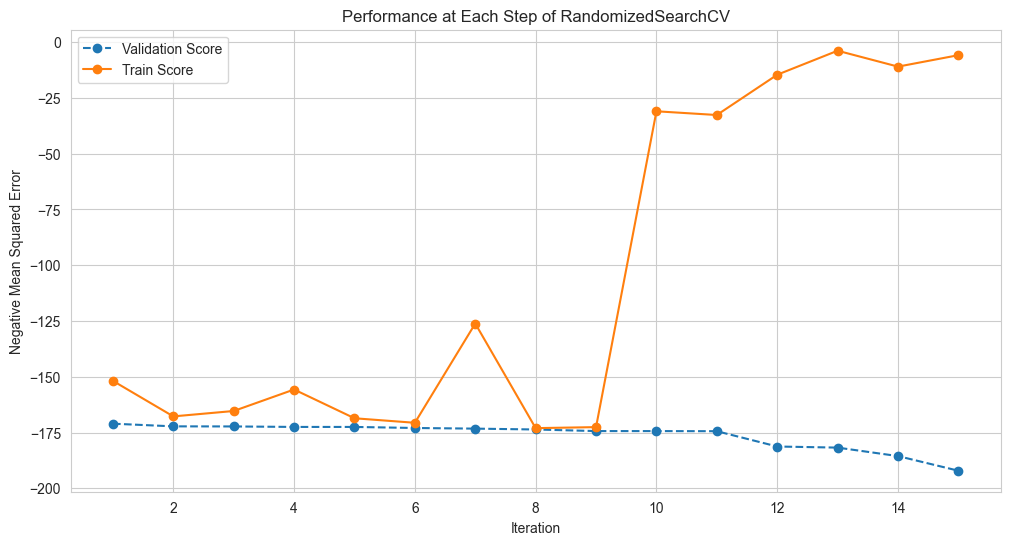

In [209]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cv_results) + 1), cv_results["mean_test_score"], marker='o', linestyle='dashed', label="Validation Score")
plt.plot(range(1, len(cv_results) + 1), cv_results["mean_train_score"], marker='o', linestyle='solid', label="Train Score")
plt.xlabel("Iteration")
plt.ylabel("Negative Mean Squared Error")
plt.title("Performance at Each Step of RandomizedSearchCV")
plt.legend()
plt.show()

In [217]:
cv_results = cv_results[['rank_test_score', 'mean_test_score', 'std_test_score', 
                         'mean_train_score', 'std_train_score', 'params']]

cv_results['combined_test_train']=cv_results['mean_test_score']*cv_results['mean_train_score']

cv_results = cv_results.sort_values(by=["mean_test_score","mean_train_score"],ascending=False)


display(cv_results)

,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score,params,combined_test_train
1,1,-171.040653,0.510679,-151.847709,0.140468,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha...",25972.131327
11,2,-172.238236,0.497468,-167.773596,0.179340,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...",28897.028182
13,3,-172.280250,0.410060,-165.352828,0.281762,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp...",28487.026404
3,4,-172.497571,0.483631,-155.717083,0.207609,"{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha...",26860.818646
9,5,-172.498345,0.458815,-168.611368,0.236795,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...",29085.182036
4,6,-172.972510,0.459774,-170.638308,0.229859,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha...",29515.736451
5,7,-173.258148,0.279271,-126.136498,0.371963,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...",21854.175992
12,8,-173.647228,0.486220,-173.038021,0.235618,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp...",30047.572751
2,9,-174.354740,0.454244,-172.583778,0.247174,"{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alp...",30090.799824
7,10,-174.359178,0.505305,-30.967147,0.371535,"{'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alp...",5399.406297


In [210]:
best_xgb = random_search_xgb.best_estimator_

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Optimized XgBoost - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Optimized XgBoost - MSE: 168.1244, RMSE: 12.9663


In [ ]:
y_pred_submit = best_xgb.predict(test_new_predict_rf[[col for col in X_train.columns]])

submission = pd.DataFrame({
    'id': test_new_predict_rf['id'],  
    'Listening_Time_Minutes': y_pred_submit
})
submission.to_csv('Ver5_XGB_RSHPT_OHE_Corrected_Final.csv',index=False)

## LightGBM

In [261]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import KFold
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'goss',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),

        # 'subsample' not used in GOSS (remove it)
    }

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_test, y_test)

    model = lgb.train(
        param,
        lgb_train,
        num_boost_round=500,
        valid_sets=[lgb_valid],
        valid_names=['valid'],
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=0)
        ]
    )

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

# Run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best results
print("Best params:", study.best_params)
print("Best RMSE on X_test:", study.best_value)

# Final model with best params on full training data
best_params = study.best_params
best_params.update({
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'goss'
})

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_train, y_train),
    num_boost_round=500,
    valid_sets=[lgb.Dataset(X_test, y_test)],
    valid_names=['valid'],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

[I 2025-04-07 21:27:55,892] A new study created in memory with name: no-name-d1e0a71b-0c3c-4932-9dfe-70fc1ea35cfe


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 14.6867


[I 2025-04-07 21:28:05,736] Trial 0 finished with value: 14.686714680411924 and parameters: {'learning_rate': 0.0055845260844983105, 'num_leaves': 2002, 'max_depth': 6, 'min_child_samples': 28, 'colsample_bytree': 0.44404849373789207, 'reg_alpha': 0.008775457685389067, 'reg_lambda': 1.336953500962859e-05}. Best is trial 0 with value: 14.686714680411924.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.0984


[I 2025-04-07 21:28:11,939] Trial 1 finished with value: 13.098378567525515 and parameters: {'learning_rate': 0.021807069775114277, 'num_leaves': 739, 'max_depth': 4, 'min_child_samples': 52, 'colsample_bytree': 0.9586465171039066, 'reg_alpha': 0.032434887491614994, 'reg_lambda': 9.008911927321015e-05}. Best is trial 1 with value: 13.098378567525515.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9786


[I 2025-04-07 21:28:30,516] Trial 2 finished with value: 12.978615232518484 and parameters: {'learning_rate': 0.029108875408425328, 'num_leaves': 2705, 'max_depth': 10, 'min_child_samples': 71, 'colsample_bytree': 0.8677296093811457, 'reg_alpha': 0.8038531503689037, 'reg_lambda': 1.0426475717493118}. Best is trial 2 with value: 12.978615232518484.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 17.5169


[I 2025-04-07 21:28:49,595] Trial 3 finished with value: 17.516898484822928 and parameters: {'learning_rate': 0.0020296984342198475, 'num_leaves': 2237, 'max_depth': 8, 'min_child_samples': 70, 'colsample_bytree': 0.6505969259465323, 'reg_alpha': 1.686082780351188e-07, 'reg_lambda': 8.74229094697751e-07}. Best is trial 2 with value: 12.978615232518484.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 14.0806


[I 2025-04-07 21:28:59,706] Trial 4 finished with value: 14.080568636211204 and parameters: {'learning_rate': 0.006242320755714723, 'num_leaves': 2556, 'max_depth': 6, 'min_child_samples': 14, 'colsample_bytree': 0.4809197949211377, 'reg_alpha': 0.0016403378525410366, 'reg_lambda': 0.11201736824506145}. Best is trial 2 with value: 12.978615232518484.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 15.5221


[I 2025-04-07 21:29:44,041] Trial 5 finished with value: 15.522097662156327 and parameters: {'learning_rate': 0.0025233782993111533, 'num_leaves': 2317, 'max_depth': 11, 'min_child_samples': 75, 'colsample_bytree': 0.7891516945357591, 'reg_alpha': 3.2326487444632734e-08, 'reg_lambda': 7.920175766613578e-07}. Best is trial 2 with value: 12.978615232518484.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[478]	valid's rmse: 12.9128


[I 2025-04-07 21:30:31,618] Trial 6 finished with value: 12.9128216632688 and parameters: {'learning_rate': 0.02788009250123795, 'num_leaves': 2564, 'max_depth': 13, 'min_child_samples': 6, 'colsample_bytree': 0.6616318144123621, 'reg_alpha': 0.0071582741288181975, 'reg_lambda': 0.4656257998232774}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.0749


[I 2025-04-07 21:30:43,366] Trial 7 finished with value: 13.074928782240736 and parameters: {'learning_rate': 0.011458496327237177, 'num_leaves': 2515, 'max_depth': 7, 'min_child_samples': 7, 'colsample_bytree': 0.68925871594125, 'reg_alpha': 0.00034554008090775237, 'reg_lambda': 1.8829653797245005e-08}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[159]	valid's rmse: 13.0716


[I 2025-04-07 21:30:47,064] Trial 8 finished with value: 13.071551061216132 and parameters: {'learning_rate': 0.2441858927029069, 'num_leaves': 1006, 'max_depth': 6, 'min_child_samples': 29, 'colsample_bytree': 0.47241390793002275, 'reg_alpha': 9.537066741232563, 'reg_lambda': 3.856947482590531e-05}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds


[I 2025-04-07 21:30:51,411] Trial 9 finished with value: 13.137003251951018 and parameters: {'learning_rate': 0.29626366911074187, 'num_leaves': 1026, 'max_depth': 19, 'min_child_samples': 52, 'colsample_bytree': 0.9231724208899191, 'reg_alpha': 0.00023402212817132782, 'reg_lambda': 0.009679958010843582}. Best is trial 6 with value: 12.9128216632688.


Early stopping, best iteration is:
[14]	valid's rmse: 13.137
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.0274


[I 2025-04-07 21:30:59,525] Trial 10 finished with value: 13.02742779350705 and parameters: {'learning_rate': 0.06752422477225427, 'num_leaves': 53, 'max_depth': 15, 'min_child_samples': 88, 'colsample_bytree': 0.5976610642765086, 'reg_alpha': 3.267471300798856e-05, 'reg_lambda': 6.457261629113944}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[483]	valid's rmse: 12.9611


[I 2025-04-07 21:31:24,467] Trial 11 finished with value: 12.961082413484062 and parameters: {'learning_rate': 0.03773568298136753, 'num_leaves': 2907, 'max_depth': 12, 'min_child_samples': 70, 'colsample_bytree': 0.8165846591463515, 'reg_alpha': 1.6479479126894996, 'reg_lambda': 7.552275155358591}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	valid's rmse: 12.9775


[I 2025-04-07 21:31:39,398] Trial 12 finished with value: 12.977547274991807 and parameters: {'learning_rate': 0.06942241949977773, 'num_leaves': 2974, 'max_depth': 15, 'min_child_samples': 36, 'colsample_bytree': 0.7823465116114494, 'reg_alpha': 0.5060410328836368, 'reg_lambda': 0.007820625449511745}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[391]	valid's rmse: 12.9806


[I 2025-04-07 21:32:02,975] Trial 13 finished with value: 12.980602881055068 and parameters: {'learning_rate': 0.05667227992380635, 'num_leaves': 1741, 'max_depth': 14, 'min_child_samples': 97, 'colsample_bytree': 0.5799983860659581, 'reg_alpha': 0.15112913562550692, 'reg_lambda': 8.102388446926902}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid's rmse: 13.0577


[I 2025-04-07 21:32:13,673] Trial 14 finished with value: 13.05766257134471 and parameters: {'learning_rate': 0.13494080362648922, 'num_leaves': 2977, 'max_depth': 19, 'min_child_samples': 42, 'colsample_bytree': 0.800051958998835, 'reg_alpha': 4.2255682523520755e-06, 'reg_lambda': 0.07791825984868277}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9474


[I 2025-04-07 21:32:46,059] Trial 15 finished with value: 12.947357275794156 and parameters: {'learning_rate': 0.031166227417444112, 'num_leaves': 1887, 'max_depth': 13, 'min_child_samples': 62, 'colsample_bytree': 0.8669549459304614, 'reg_alpha': 0.0139195100012017, 'reg_lambda': 0.0015880877721045448}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9172


[I 2025-04-07 21:33:32,775] Trial 16 finished with value: 12.917162735148725 and parameters: {'learning_rate': 0.012151428869078433, 'num_leaves': 1608, 'max_depth': 17, 'min_child_samples': 19, 'colsample_bytree': 0.9987047882298454, 'reg_alpha': 0.007844080383536383, 'reg_lambda': 0.0016347781475282326}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.0131


[I 2025-04-07 21:34:11,764] Trial 17 finished with value: 13.013092645863523 and parameters: {'learning_rate': 0.010182572981965258, 'num_leaves': 1328, 'max_depth': 17, 'min_child_samples': 17, 'colsample_bytree': 0.5652492505881493, 'reg_alpha': 3.4339428999118497e-06, 'reg_lambda': 0.0007228847351871009}. Best is trial 6 with value: 12.9128216632688.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.894


[I 2025-04-07 21:34:56,207] Trial 18 finished with value: 12.893987475631782 and parameters: {'learning_rate': 0.013925880341949562, 'num_leaves': 1472, 'max_depth': 17, 'min_child_samples': 6, 'colsample_bytree': 0.990205840521718, 'reg_alpha': 0.0020482276386866844, 'reg_lambda': 0.18868492965876726}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 14.0383


[I 2025-04-07 21:35:17,938] Trial 19 finished with value: 14.038342440279216 and parameters: {'learning_rate': 0.003934259146086816, 'num_leaves': 437, 'max_depth': 17, 'min_child_samples': 9, 'colsample_bytree': 0.7268472842467846, 'reg_alpha': 0.0006292704655719368, 'reg_lambda': 0.16907801208806}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9103


[I 2025-04-07 21:35:56,104] Trial 20 finished with value: 12.910314562230983 and parameters: {'learning_rate': 0.015690940425071683, 'num_leaves': 1282, 'max_depth': 20, 'min_child_samples': 24, 'colsample_bytree': 0.7252775071296841, 'reg_alpha': 2.6810256450765987e-05, 'reg_lambda': 0.5672972536424025}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 20.6982


[I 2025-04-07 21:36:40,957] Trial 21 finished with value: 20.69817102994329 and parameters: {'learning_rate': 0.0010190598396249296, 'num_leaves': 1336, 'max_depth': 19, 'min_child_samples': 5, 'colsample_bytree': 0.7192956505338772, 'reg_alpha': 1.9992965854689323e-05, 'reg_lambda': 0.9128509712288966}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9051


[I 2025-04-07 21:37:20,280] Trial 22 finished with value: 12.90514660749018 and parameters: {'learning_rate': 0.017084610436950674, 'num_leaves': 1352, 'max_depth': 20, 'min_child_samples': 22, 'colsample_bytree': 0.6607012348366809, 'reg_alpha': 5.857510132172788e-05, 'reg_lambda': 0.021985220050606897}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9564


[I 2025-04-07 21:37:58,821] Trial 23 finished with value: 12.956411142114849 and parameters: {'learning_rate': 0.013239946954118476, 'num_leaves': 1267, 'max_depth': 20, 'min_child_samples': 23, 'colsample_bytree': 0.5284808414268555, 'reg_alpha': 3.7544329047602484e-05, 'reg_lambda': 0.024117260177252315}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 14.4476


[I 2025-04-07 21:38:31,520] Trial 24 finished with value: 14.447631254840175 and parameters: {'learning_rate': 0.0064188187087230696, 'num_leaves': 968, 'max_depth': 20, 'min_child_samples': 37, 'colsample_bytree': 0.40327611453131923, 'reg_alpha': 7.739211134222416e-07, 'reg_lambda': 0.024611233503561387}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9076


[I 2025-04-07 21:39:15,814] Trial 25 finished with value: 12.907626870849123 and parameters: {'learning_rate': 0.018306997930782047, 'num_leaves': 1539, 'max_depth': 18, 'min_child_samples': 26, 'colsample_bytree': 0.6237628057312633, 'reg_alpha': 0.00010047091289461941, 'reg_lambda': 0.9239814678836104}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[255]	valid's rmse: 12.9537


[I 2025-04-07 21:39:41,413] Trial 26 finished with value: 12.953742669123914 and parameters: {'learning_rate': 0.04657983568939762, 'num_leaves': 1642, 'max_depth': 16, 'min_child_samples': 34, 'colsample_bytree': 0.6174872447739163, 'reg_alpha': 0.0001408946293936642, 'reg_lambda': 0.0064820119339621535}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9252


[I 2025-04-07 21:40:34,161] Trial 27 finished with value: 12.92523629500212 and parameters: {'learning_rate': 0.020171219120544814, 'num_leaves': 2022, 'max_depth': 18, 'min_child_samples': 46, 'colsample_bytree': 0.5388644112414152, 'reg_alpha': 0.00116671835255216, 'reg_lambda': 0.06303957458092217}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.1156


[I 2025-04-07 21:40:58,852] Trial 28 finished with value: 13.115639410511776 and parameters: {'learning_rate': 0.007492784808559924, 'num_leaves': 615, 'max_depth': 18, 'min_child_samples': 13, 'colsample_bytree': 0.6548065088928575, 'reg_alpha': 7.155077884595019e-06, 'reg_lambda': 2.1159737208824207}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid's rmse: 13.0248


[I 2025-04-07 21:41:09,156] Trial 29 finished with value: 13.024843098465285 and parameters: {'learning_rate': 0.10256469861471473, 'num_leaves': 1975, 'max_depth': 16, 'min_child_samples': 26, 'colsample_bytree': 0.7501494949038121, 'reg_alpha': 0.0027964160845333394, 'reg_lambda': 0.26671628610612097}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.9696


[I 2025-04-07 21:41:53,769] Trial 30 finished with value: 13.969563539741532 and parameters: {'learning_rate': 0.003440821964277617, 'num_leaves': 1432, 'max_depth': 18, 'min_child_samples': 31, 'colsample_bytree': 0.8564862759406061, 'reg_alpha': 0.00012160175309916154, 'reg_lambda': 2.3692085773815217}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9239


[I 2025-04-07 21:42:29,598] Trial 31 finished with value: 12.923932691166954 and parameters: {'learning_rate': 0.015425135733390365, 'num_leaves': 1146, 'max_depth': 20, 'min_child_samples': 21, 'colsample_bytree': 0.6333003074713703, 'reg_alpha': 1.1450210374216213e-06, 'reg_lambda': 0.3862561012535822}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9017


[I 2025-04-07 21:43:12,595] Trial 32 finished with value: 12.901669600235357 and parameters: {'learning_rate': 0.020738100429008484, 'num_leaves': 1508, 'max_depth': 20, 'min_child_samples': 25, 'colsample_bytree': 0.6843143792656934, 'reg_alpha': 5.0164305006671086e-05, 'reg_lambda': 0.00015937174831463595}. Best is trial 18 with value: 12.893987475631782.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.8919


[I 2025-04-07 21:43:59,706] Trial 33 finished with value: 12.891913954953274 and parameters: {'learning_rate': 0.02182226887260097, 'num_leaves': 1762, 'max_depth': 18, 'min_child_samples': 13, 'colsample_bytree': 0.6828111936494415, 'reg_alpha': 0.05144221783781567, 'reg_lambda': 0.0001302066465975487}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9922


[I 2025-04-07 21:44:17,003] Trial 34 finished with value: 12.992201117013007 and parameters: {'learning_rate': 0.025003682624937535, 'num_leaves': 1711, 'max_depth': 9, 'min_child_samples': 11, 'colsample_bytree': 0.6912711102120592, 'reg_alpha': 0.0997373302600192, 'reg_lambda': 6.672469879662254e-05}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.158


[I 2025-04-07 21:44:23,803] Trial 35 finished with value: 13.158024607615937 and parameters: {'learning_rate': 0.009058195828051674, 'num_leaves': 2174, 'max_depth': 4, 'min_child_samples': 15, 'colsample_bytree': 0.7621069761601356, 'reg_alpha': 0.04453139125978291, 'reg_lambda': 5.630987891318752e-06}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.2873


[I 2025-04-07 21:45:18,399] Trial 36 finished with value: 13.287326144651635 and parameters: {'learning_rate': 0.004560931203477315, 'num_leaves': 1810, 'max_depth': 16, 'min_child_samples': 43, 'colsample_bytree': 0.9140640437061518, 'reg_alpha': 0.0028615745147993433, 'reg_lambda': 0.0002848553925940323}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[405]	valid's rmse: 12.9365


[I 2025-04-07 21:45:39,812] Trial 37 finished with value: 12.936529587136597 and parameters: {'learning_rate': 0.03843419684671022, 'num_leaves': 727, 'max_depth': 19, 'min_child_samples': 18, 'colsample_bytree': 0.6854929726157819, 'reg_alpha': 0.021372906481764205, 'reg_lambda': 1.1317345586539835e-05}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[450]	valid's rmse: 12.9118


[I 2025-04-07 21:46:21,286] Trial 38 finished with value: 12.911815853530905 and parameters: {'learning_rate': 0.02465175085473759, 'num_leaves': 1512, 'max_depth': 15, 'min_child_samples': 13, 'colsample_bytree': 0.8402611506445125, 'reg_alpha': 1.6519969697041852e-07, 'reg_lambda': 0.00021090000359959968}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9755


[I 2025-04-07 21:47:15,804] Trial 39 finished with value: 12.97546615047042 and parameters: {'learning_rate': 0.008314412715547557, 'num_leaves': 2158, 'max_depth': 17, 'min_child_samples': 10, 'colsample_bytree': 0.6611543801657759, 'reg_alpha': 0.0004864100980965042, 'reg_lambda': 3.938353317298033e-07}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9384


[I 2025-04-07 21:47:47,126] Trial 40 finished with value: 12.938447559500087 and parameters: {'learning_rate': 0.020147924619724377, 'num_leaves': 854, 'max_depth': 19, 'min_child_samples': 60, 'colsample_bytree': 0.8967399002536438, 'reg_alpha': 0.003817495267372777, 'reg_lambda': 1.9323475711413113e-06}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.913


[I 2025-04-07 21:48:30,586] Trial 41 finished with value: 12.912985872820341 and parameters: {'learning_rate': 0.01678576934987295, 'num_leaves': 1479, 'max_depth': 18, 'min_child_samples': 27, 'colsample_bytree': 0.6226440086608096, 'reg_alpha': 0.00010085575008339842, 'reg_lambda': 0.002501297271774804}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[420]	valid's rmse: 12.9083


[I 2025-04-07 21:49:06,651] Trial 42 finished with value: 12.90833824060476 and parameters: {'learning_rate': 0.034208174727253605, 'num_leaves': 1558, 'max_depth': 20, 'min_child_samples': 5, 'colsample_bytree': 0.6834599625019196, 'reg_alpha': 6.811867558682298e-05, 'reg_lambda': 0.0001159108844883148}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9123


[I 2025-04-07 21:49:55,357] Trial 43 finished with value: 12.912344705436265 and parameters: {'learning_rate': 0.020665480949443475, 'num_leaves': 1813, 'max_depth': 18, 'min_child_samples': 21, 'colsample_bytree': 0.5397864817234029, 'reg_alpha': 1.2342317504520383e-05, 'reg_lambda': 2.839197485169728e-05}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9477


[I 2025-04-07 21:50:32,646] Trial 44 finished with value: 12.947737156383491 and parameters: {'learning_rate': 0.012869805455910568, 'num_leaves': 1164, 'max_depth': 19, 'min_child_samples': 31, 'colsample_bytree': 0.6069715281825596, 'reg_alpha': 0.0005373557982500572, 'reg_lambda': 0.0006728873682550168}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[497]	valid's rmse: 12.9682


[I 2025-04-07 21:50:58,502] Trial 45 finished with value: 12.96817156861506 and parameters: {'learning_rate': 0.02740923437966921, 'num_leaves': 1148, 'max_depth': 11, 'min_child_samples': 15, 'colsample_bytree': 0.5007535389040152, 'reg_alpha': 0.0011966814094029616, 'reg_lambda': 2.189579548954834}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[359]	valid's rmse: 12.9539


[I 2025-04-07 21:51:29,414] Trial 46 finished with value: 12.953859700253895 and parameters: {'learning_rate': 0.04453361473634575, 'num_leaves': 1960, 'max_depth': 14, 'min_child_samples': 39, 'colsample_bytree': 0.5786685851201342, 'reg_alpha': 0.4391170143178615, 'reg_lambda': 0.05546977285483871}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 13.3469


[I 2025-04-07 21:52:12,405] Trial 47 finished with value: 13.346901174709316 and parameters: {'learning_rate': 0.00573103662000822, 'num_leaves': 1387, 'max_depth': 16, 'min_child_samples': 28, 'colsample_bytree': 0.6502860654981092, 'reg_alpha': 2.6236570919148057, 'reg_lambda': 0.021075748903538902}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9366


[I 2025-04-07 21:52:57,176] Trial 48 finished with value: 12.936649122582274 and parameters: {'learning_rate': 0.01761035632546391, 'num_leaves': 2346, 'max_depth': 17, 'min_child_samples': 83, 'colsample_bytree': 0.7553796647365627, 'reg_alpha': 0.0002885809441202439, 'reg_lambda': 4.241830211556554e-08}. Best is trial 33 with value: 12.891913954953274.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.9361


[I 2025-04-07 21:53:46,700] Trial 49 finished with value: 12.936079521303132 and parameters: {'learning_rate': 0.011259676203711924, 'num_leaves': 1692, 'max_depth': 19, 'min_child_samples': 47, 'colsample_bytree': 0.7062851772784722, 'reg_alpha': 0.06941421584821973, 'reg_lambda': 0.003297648905184882}. Best is trial 33 with value: 12.891913954953274.


Best params: {'learning_rate': 0.02182226887260097, 'num_leaves': 1762, 'max_depth': 18, 'min_child_samples': 13, 'colsample_bytree': 0.6828111936494415, 'reg_alpha': 0.05144221783781567, 'reg_lambda': 0.0001302066465975487}
Best RMSE on X_test: 12.891913954953274
Training until validation scores don't improve for 50 rounds
[100]	valid's rmse: 13.9679
[200]	valid's rmse: 12.9883
[300]	valid's rmse: 12.9145
[400]	valid's rmse: 12.899
[500]	valid's rmse: 12.8919
Did not meet early stopping. Best iteration is:
[500]	valid's rmse: 12.8919


In [263]:
y_pred=final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print(f"Optimized LightGBM - MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Optimized LightGBM - MSE: 166.2014, RMSE: 12.8919


In [259]:
y_pred_submit =final_model.predict(test_new_predict_rf[[col for col in X_train.columns]])

submission = pd.DataFrame({
    'id': test_new_predict_rf['id'],  
    'Listening_Time_Minutes': y_pred_submit
})
submission.to_csv('Ver7_LGBM_OptunaGoss_OHE_Corrected_Final.csv',index=False)